In [339]:
import numpy as np
correlations = np.load("./correlations.pkl.npy")
check = np.load("./check.pkl.npy")

In [340]:
import matplotlib.pyplot as plt
%matplotlib inline

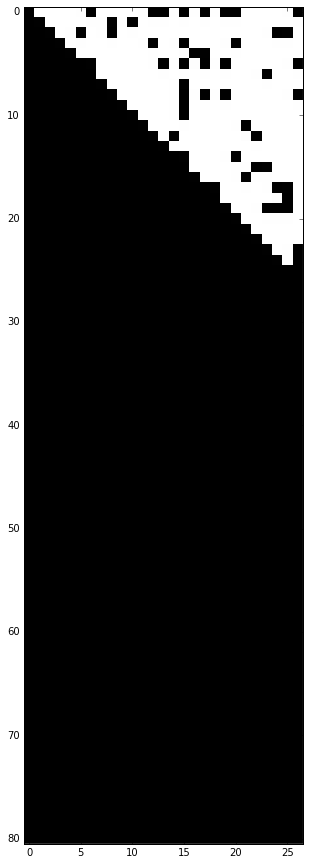

In [341]:
# GPU correlations (symptomatic that the first diagonals (8-blocks) are 0 (== black) always
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(correlations, cmap="gray", interpolation="none")

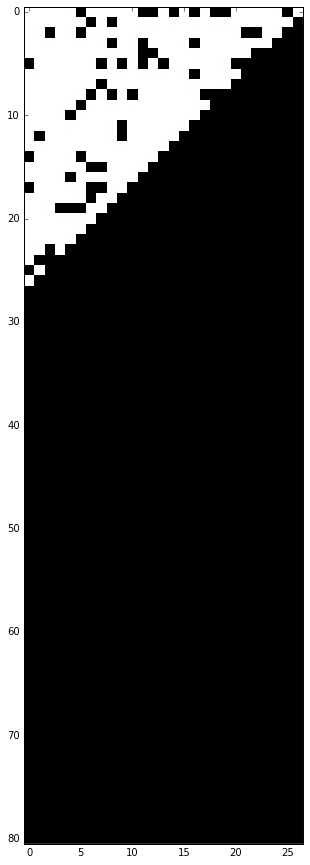

In [342]:
# Ground truth (seems wrong...diagonal not white == 1)
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(check, cmap="gray", interpolation="none")

In [343]:
check.shape

(81, 27)

In [344]:
# let's do it again, recalculate ground truth 
# 27 is the last number where there is a "full==54" sliding window to check in the future (27+54=81)
x = np.load("./x.pkl.npy")
y = np.load("./y.pkl.npy")
z = np.load("./z.pkl.npy")
ct = np.load("./ct.pkl.npy")
check1 = np.zeros_like(correlations)
sliding_window = check1.shape[1]
for i in range(check1.shape[0]):
    for j in range(i , max(sliding_window + i, sliding_window)):
        if j < check1.shape[0]:
            print(i,j)
            if (ct[i]-ct[j])**2 <= (x[i]-x[j])**2  + (y[i] - y[j])**2 + (z[i] - z[j])**2:
                check1[i, j-i] = 1

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
4 4
4 5
4 6
4 7
4 8
4 9
4 10
4 11
4 12
4 13
4 14
4 15
4 16
4 17
4 18
4 19
4 20
4 21
4 22
4 23
4 24
4 25
4 26
4 27
4 28
4 29
4 30
5 5
5 6
5 7
5 8
5 9
5 10
5 11
5 12
5 13
5 14
5 15
5 16
5 17
5 18
5 19
5 20
5 21
5 22
5 23
5 24
5 25
5 26
5 27
5 28
5 29
5 30
5 31
6 6
6 7
6 8
6 9
6 10
6 11
6 12
6 13
6 14
6 15
6 16
6 17
6 18
6 19
6 20
6 21
6 22
6 23
6 24
6 25
6 26
6 27
6 28
6 29
6 30
6 31
6 32
7 7
7 8
7 9
7 10
7 11
7 12
7 13
7 14
7 15
7 16
7 17
7 18
7 19
7 20
7 21
7 22
7 23
7 24
7 25
7 26
7 27
7 

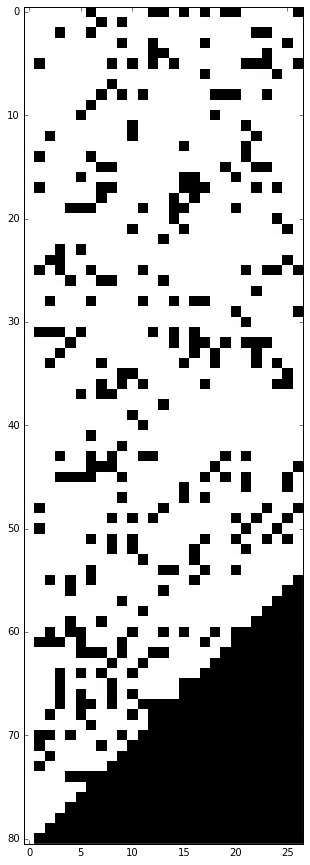

In [345]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.imshow(check1, cmap="gray", interpolation="none")

In [240]:
N = check.shape[0]
np.abs(check - check1).max()


1

In [134]:
x.shape

(81,)

In [135]:
import numpy as np
np.where(x==0.82403624)

(array([], dtype=int64),)

In [113]:
np.where(x==0.81775689)

(array([8]),)

In [114]:
y[8:16]

array([ 0.49462005,  0.13737926,  0.63217103,  0.88951969,  0.95967758,
        0.93269199,  0.01922691,  0.11102214], dtype=float32)

In [84]:
y[24:]

array([ 0.86980486,  0.95739377,  0.45722562,  0.24933068,  0.79062432,
        0.41660839,  0.2160219 ,  0.20491999,  0.89854044,  0.18462023,
        0.29852843,  0.35963443,  0.6159724 ,  0.72406787,  0.88663906,
        0.8957932 ,  0.95089775,  0.81628722,  0.38464957,  0.09199598,
        0.84929907,  0.89802736,  0.47384384,  0.32334676,  0.68980533,
        0.55929697,  0.85717803,  0.43673065,  0.53199059,  0.61012739,
        0.35549074,  0.21740046,  0.72848731,  0.23121756,  0.0925628 ,
        0.69927949,  0.2881934 ,  0.51331192,  0.0060772 ,  0.86945933], dtype=float32)

In [85]:
z[24:]

array([ 0.19824067,  0.71382284,  0.06260016,  0.73668307,  0.11869724,
        0.11193934,  0.72747481,  0.46255267,  0.81613207,  0.77432835,
        0.20919167,  0.93272632,  0.14098145,  0.77419633,  0.80323517,
        0.90561998,  0.7683695 ,  0.97668117,  0.78336018,  0.56513208,
        0.13854954,  0.80031669,  0.46786216,  0.97926974,  0.51297593,
        0.30397162,  0.32215321,  0.13564816,  0.71447772,  0.33202007,
        0.29784349,  0.80185348,  0.31685761,  0.11355828,  0.39447027,
        0.69777393,  0.06081379,  0.44030124,  0.90970933,  0.02768658], dtype=float32)

In [138]:
y.shape

(81,)

In [139]:
ct.shape

(81,)